In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape = (28,28)))              # input layer
# model.add(keras.layers.Dense(300, activation = 'relu'))             # hidden layer
# model.add(keras.layers.Dense(100, activation = 'relu'))             # hidden layer
# model.add(keras.layers.Dense(10, activation = 'softmax'))           # output layer

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,  activation = 'softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(x_train_full, y_train_full),(x_test,y_test)= fashion_mnist.load_data()

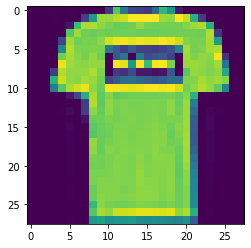

In [16]:
plt.imshow(x_train_full[1]);

In [22]:
x_train_full[0].shape

(28, 28)

In [7]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000]    , y_train_full[5000:]

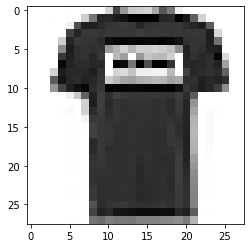

In [19]:
plt.imshow(x_valid[1], cmap ='binary');

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'sgd',metrics = ['accuracy'])

In [10]:
history = model.fit(x_train,y_train, validation_data=(x_valid,y_valid), epochs = 30)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0011 - accuracy: 0.6772 - val_loss: 0.5075 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8235 - val_loss: 0.4442 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4535 - accuracy: 0.8386 - val_loss: 0.4197 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4240 - accuracy: 0.8498 - val_loss: 0.4142 - val_accuracy: 0.8556
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3989 - accuracy: 0.8571 - val_loss: 0.3943 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3828 - accuracy: 0.8640 - val_loss: 0.3817 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.8720 - val_loss: 0.3700 - val_accuracy:

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.0215 - accuracy: 0.8438


[67.02145385742188, 0.8438000082969666]

In [31]:
prediction = model.predict_classes(x_test[0:30])

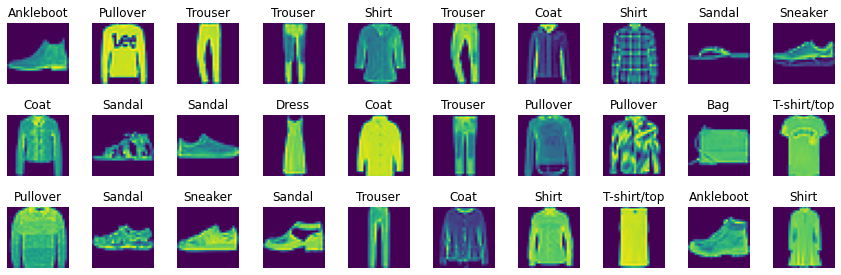

In [56]:
rows = 3
cols = 10
plt.figure(figsize = (cols*1.5,rows*1.5,))
for row in range(rows):
    for column in range(cols):
        i = row * cols + column
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_test[i])
        plt.title(class_names[prediction[i]])
        plt.axis('off')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

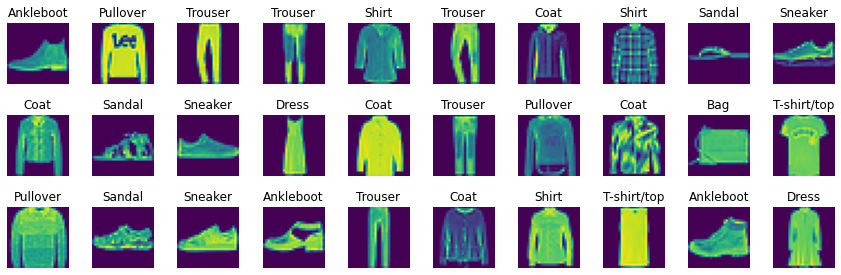

In [59]:
rows = 3
cols = 10
plt.figure(figsize = (cols*1.5,rows*1.5,))
for row in range(rows):
    for column in range(cols):
        i = row * cols + column
        plt.subplot(rows,cols,i+1)
        plt.imshow(x_test[i])
        plt.title(class_names[y_test[i]])
        plt.axis('off')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()